In [1]:
!pip install tensorflow

In [4]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
series = np.sin((0.1 * np.arange(400)) ** 2)

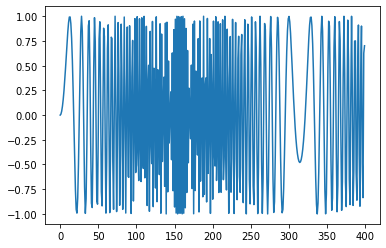

In [6]:
plt.plot(series)
plt.show()

In [7]:
# build a dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T] # 10개 데이터 중 9개
    X.append(x)
    y = series[t+T] # 10개 데이터 중 마지막 데이터
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # N x T
Y = np.array(Y) # numpy 배열
N = len(X)
print(f'X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}')

X.shape:(390, 10), Y.shape:(390,), N.length:390


In [8]:
# make a model
i = Input(shape = (T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.01))

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [10]:
# train the MODEL
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, 
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80
7/7 [==============================] - 0s 14ms/step - loss: 1.3730 - val_loss: 1.0242
Epoch 2/80
7/7 [==============================] - 0s 4ms/step - loss: 1.1480 - val_loss: 0.9564
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.9592 - val_loss: 0.8748
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.8330 - val_loss: 0.8168
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7312 - val_loss: 0.7660
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6604 - val_loss: 0.7322
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6125 - val_loss: 0.7133
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.6989
Epoch 9/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5602 - val_loss: 0.6909
Epoch 10/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5405 - val_loss: 0.6756
Epoch 11/80
7/7 [=====================

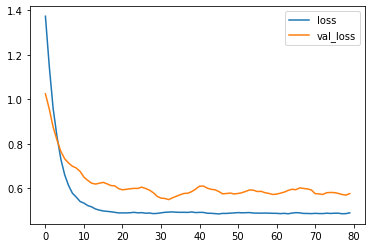

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [12]:
outputs = model.predict(X)
print(outputs.shape)

(390, 1)


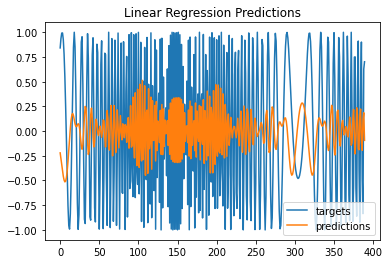

In [13]:
predictions = outputs[:, 0]
plt.plot(Y, label = 'targets') # 정답데이터
plt.plot(predictions, label = 'predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

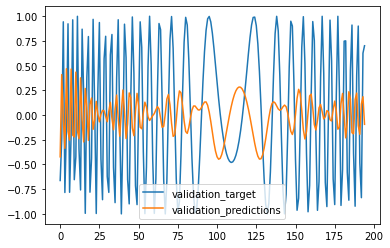

In [14]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    
    validation_predictions.append(p)
    
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()

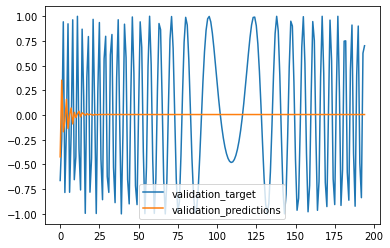

In [15]:
# 오차가 생겼다,,

# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 마지막 데이터 - 이전 데이터 이용해서 예측.

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # 움직이는 듯한 느낌을 줌.
    #print(last_x)
    last_x[-1] = p
    
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()

In [ ]:
# 사용 못할듯,,,

### RNN

In [17]:
### build a RNN model
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape = (T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.05))

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], batch_size = 32,
             epochs = 200, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/200
7/7 [==============================] - 1s 23ms/step - loss: 0.5782 - val_loss: 0.5864
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4355 - val_loss: 0.5039
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.4441 - val_loss: 0.4891
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.3739 - val_loss: 0.4465
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.3805 - val_loss: 0.3331
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2738 - val_loss: 0.4397
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.2523 - val_loss: 0.2630
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1421 - val_loss: 0.1379
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1248 - val_loss: 0.1543
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0812 - val_loss: 0.1377
Epoch 11/200
7/7 [==========

7/7 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.0772
Epoch 168/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0340 - val_loss: 0.0578
Epoch 169/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0362 - val_loss: 0.0632
Epoch 170/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0408
Epoch 171/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0471 - val_loss: 0.0912
Epoch 172/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0385 - val_loss: 0.0537
Epoch 173/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0814
Epoch 174/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.0951
Epoch 175/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0549 - val_loss: 0.0863
Epoch 176/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.0594
Epoch 177/200
7/7 [=====

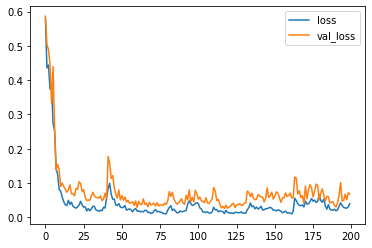

In [19]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

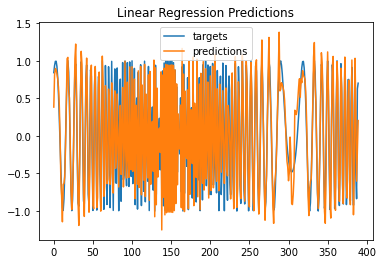

In [20]:
outputs = model.predict(X)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

In [ ]:
# 비슷하게 나옴,,

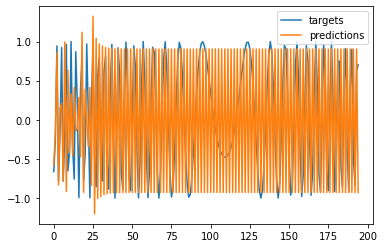

In [22]:
# Forecast future values
forecast = []
_input = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(_input.reshape(1, T, 1))[0, 0]
    
    forecast.append(f)
    
    _input = np.roll(_input, -1) # 움직이는 듯한 느낌을 줌.
    #print(last_x)
    _input[-1] = f
    
plt.plot(Y[-N//2:], label = 'targets')
plt.plot(forecast, label = 'predictions')
plt.legend()
plt.show()

### LSTM

In [23]:
### build a LSTM model
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape = (T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.05))

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
# train the LSTM
r = model.fit(X[:-N//2], Y[:-N//2], batch_size = 32,
             epochs = 200, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/200
7/7 [==============================] - 1s 46ms/step - loss: 0.5288 - val_loss: 0.5103
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5179 - val_loss: 0.4807
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5050 - val_loss: 0.4859
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5336 - val_loss: 0.4759
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4883 - val_loss: 0.4873
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4615 - val_loss: 0.5013
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3961 - val_loss: 0.4648
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3622 - val_loss: 0.4461
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2718 - val_loss: 0.3944
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2105 - val_loss: 0.2221
Epoch 11/200
7/7 [==========

7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0184
Epoch 168/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0176
Epoch 169/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0223
Epoch 170/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0156
Epoch 171/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0259
Epoch 172/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0156
Epoch 173/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0232
Epoch 174/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0220
Epoch 175/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0160
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0250
Epoch 177/200
7/7 [=====

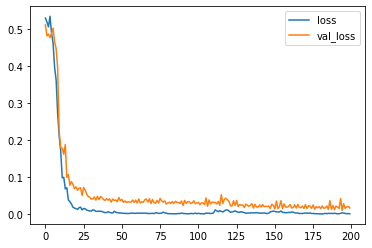

In [26]:
# loss 값이 많이 낮아짐,,,

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

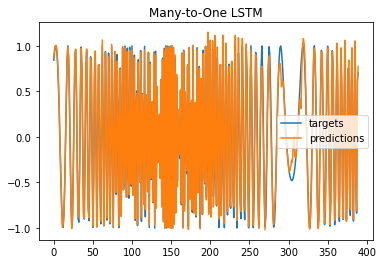

In [28]:
outputs = model.predict(X)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.title('Many-to-One LSTM')
plt.legend()
plt.show()

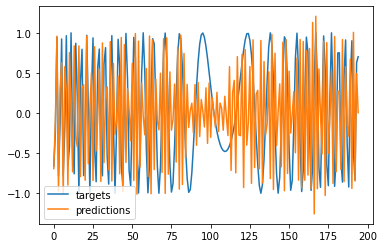

In [29]:
# Forecast future values
forecast = []
_input = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(_input.reshape(1, T, 1))[0, 0]
    
    forecast.append(f)
    
    _input = np.roll(_input, -1) # 움직이는 듯한 느낌을 줌.
    #print(last_x)
    _input[-1] = f
    
plt.plot(Y[-N//2:], label = 'targets')
plt.plot(forecast, label = 'predictions')
plt.legend()
plt.show()

In [ ]:
# RNN 사용할 때는 사용할 만한 수준임.
# LSTM과 CNN 같이 사용할 수 있음.